In [122]:
from __future__ import unicode_literals, print_function
import csv, os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

pol_data = pd.read_csv(r'E:\Programming\python\창회선배스터디\SSAbasedTrend\1-SO-SSAbasedTrend-InputSample.t.csv', names=['date','pol'])[1:]

# pol_data['pol'] = np.where(pol_data['pol'] == 'POSITIVE','P','N')

date = pol_data.date.tolist()
data = pol_data.values.tolist()
pv = list(set(pol_data.pol.tolist()))

print(pol_data)
print(data[:10])
print(pv)
print(date[:10])

            date       pol
1     2015-04-16  POSITIVE
2     2015-05-05  POSITIVE
3     2015-06-07  POSITIVE
4     2015-06-13  POSITIVE
5     2015-06-14  POSITIVE
...          ...       ...
1989  2017-09-22  POSITIVE
1990  2017-09-23  POSITIVE
1991  2017-09-23  POSITIVE
1992  2017-09-24  POSITIVE
1993  2017-09-27  POSITIVE

[1993 rows x 2 columns]
[['2015-04-16', 'POSITIVE'], ['2015-05-05', 'POSITIVE'], ['2015-06-07', 'POSITIVE'], ['2015-06-13', 'POSITIVE'], ['2015-06-14', 'POSITIVE'], ['2015-06-14', 'POSITIVE'], ['2015-06-19', 'POSITIVE'], ['2015-06-20', 'POSITIVE'], ['2015-06-24', 'POSITIVE'], ['2015-06-26', 'POSITIVE']]
['POSITIVE', 'NEGATIVE']
['2015-04-16', '2015-05-05', '2015-06-07', '2015-06-13', '2015-06-14', '2015-06-14', '2015-06-19', '2015-06-20', '2015-06-24', '2015-06-26']


In [22]:
###날짜 하루씩 늘리기


startDate = "20191214"
endDate = "20191230"
tempDt = dt.date (year=int (startDate[0:4]), month=int (startDate[4:6]), day=int (startDate[6:8]))
endDt = dt.date (year=int (endDate[0:4]), month=int (endDate[4:6]), day=int (endDate[6:8]))
dtList = []
while True:
    tempStr = str(tempDt)
    dtList.append(tempStr)
    tempDt += dt.timedelta(days=1)
    if tempDt == endDt:
        tempStr = str(tempDt)
        dtList.append(tempStr)
        break
        
print(dtList)

['2019-12-14', '2019-12-15', '2019-12-16', '2019-12-17', '2019-12-18', '2019-12-19', '2019-12-20', '2019-12-21', '2019-12-22', '2019-12-23', '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27', '2019-12-28', '2019-12-29', '2019-12-30']


기간(일수로)50
[{'date': '2015-04-16', 'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSITIVE': 1, 'NEGATIVE': 0}, {'POSIT

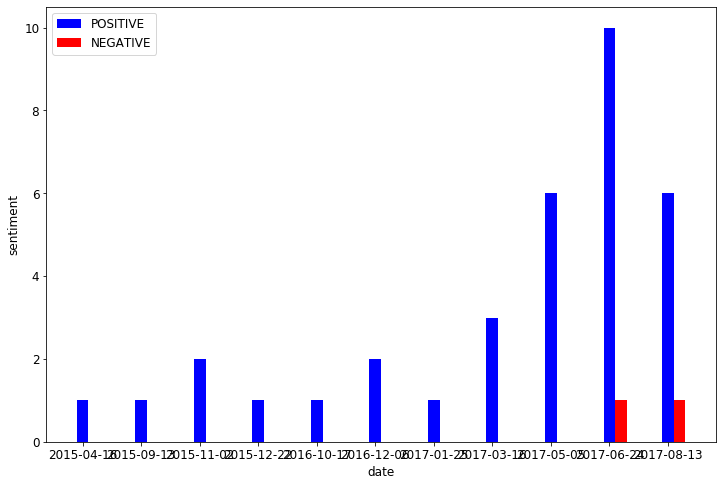

In [76]:
from __future__ import unicode_literals, print_function
import csv, os, re
import pandas as pd
import plotnine
from plotnine import *
import numpy as np
import matplotlib
import matplotlib.pyplot as pyplot
import datetime as dt
%matplotlib inline

data = list(csv.reader(open(r'F:\Programming\python\창회선배스터디\SSAbasedTrend\1-SO-SSAbasedTrend-InputSample.t.csv', 'r', encoding='cp949')))[1:]


pol_data = pd.read_csv(r'F:\Programming\python\창회선배스터디\SSAbasedTrend\1-SO-SSAbasedTrend-InputSample.t.csv', names=['date','pol'])[1:]

# pol_data['pol'] = np.where(pol_data['pol'] == 'POSITIVE','P','N')

# date = pol_data.date.tolist() #날짜 리스트화
# data = pol_data.values.tolist()
pv = list(set(pol_data.pol.tolist())) #논항들 구하기

n = int(input('기간(일수로)'))

###날짜 기간 설정
startDate = data[0][0]
endDate = data[-1][0] 
tempDt =pd.to_datetime(startDate,dayfirst=True)
tempDt = dt.datetime.date(tempDt)
endDt = pd.to_datetime(endDate,dayfirst=True)
dtList = []
while True:
    tempStr = str(tempDt)
    dtList.append(tempStr)
    tempDt += dt.timedelta(days=n)
    if tempDt >= endDt:
        tempStr = str(tempDt)
        dtList.append(tempStr)
        break
        
# print(dtList)


##값들별로 리스트화 하기
res = []

for x in data:
    temp = {}
    for y in dtList:
        if y in x:
            temp['date'] = y
        else:
            continue 
    for z in pv:
        if z in pv:
            temp[z] = x.count(z)
        else:
            continue
    res.append(temp)

print(res[:50]) 
#데이터프레임화 한 후 sumup해주기

temp_df = pd.DataFrame(res)
temp_df = temp_df.fillna(0)
temp_df = temp_df.groupby(['date'], as_index=False).sum() ##기준이되는 열로 병합헤ㅐ주기
temp_df = temp_df[1:]
print(temp_df.mean())

# df_dt = temp_df.set_index('date')
print(df_dt)





# plt.figure()

# # line = plt.plot(df_dt,marker='o',label=['pos','neg'])
# line2 = plt.plot(df_dt.mean())
# # grp = line + line2

# plt.show()

#plotnine으로 그리기

# def poly(x, p):
#     x = np.array(x)
#     X = np.transpose(np.vstack((x**k for k in range(p+1))))
#     return np.linalg.qr(X)[0][:,1:]

# m = poly(temp_df['date'],1)

# pol_graph = (
#     ggplot(pol_df,aes(x='date'))
#     + stat_smooth(aes(y='POSITIVE'),color='blue',geom='smooth', position='identity',method='lm',se=False,n=smthlv,group=1) #평균 선 그리기
#     + stat_smooth(aes( y='NEGATIVE'),color='red',method='lm',se=False,n=smthlv,group=2) #평균 선 그리기
#     + geom_point(aes(x='date', y='POSITIVE'),color='blue',alpha=0.3) #alpha는 투명도 0부터1까지
#     + geom_line(aes(x='date', y='POSITIVE'),color='blue',alpha=0.3,group=1)
#     + geom_point(aes(x='date', y='NEGATIVE'),color='red',alpha=0.3)
#     + geom_line(aes(x='date', y='NEGATIVE'),color='red',alpha=0.3,group=2)
#     + xlab('date')
#     + ylab('Sentiment')

# )


pyplot.rcParams["font.size"] = 12
pyplot.rcParams["figure.figsize"] = (12, 8)

pyplot.figure()

x = np.arange(len(temp_df['date']))

pyplot.bar(x-0.0, temp_df['POSITIVE'], label='POSITIVE', width=0.2, color='blue')
pyplot.bar(x+0.2,temp_df['NEGATIVE'] , label='NEGATIVE', width=0.2, color='red')
pyplot.xticks(x, temp_df['date'])

pyplot.legend()
pyplot.xlabel('date')
pyplot.ylabel('sentiment')
pyplot.title('')

# pyplot.savefig('ti.png')

pyplot.show()



In [139]:
###날짜 기간 설정
# term = input("day, week, month,year")
# if term != 'day' or 'week' or 'month' or 'year':
#     print

startDate = data[0][0]
endDate = data[-1][0] 
tempDt =pd.to_datetime(startDate,dayfirst=True)
tempDt = dt.datetime.date(tempDt)
endDt = pd.to_datetime(endDate,dayfirst=True)
dtList = []
while True:
    tempStr = str(tempDt)
    dtList.append(tempStr)
    tempDt += dt.timedelta(weeks=3)
    if tempDt >= endDt:
        tempStr = str(tempDt)
        dtList.append(tempStr)
        break
        
print(dtList)


['2015-04-16', '2015-05-07', '2015-05-28', '2015-06-18', '2015-07-09', '2015-07-30', '2015-08-20', '2015-09-10', '2015-10-01', '2015-10-22', '2015-11-12', '2015-12-03', '2015-12-24', '2016-01-14', '2016-02-04', '2016-02-25', '2016-03-17', '2016-04-07', '2016-04-28', '2016-05-19', '2016-06-09', '2016-06-30', '2016-07-21', '2016-08-11', '2016-09-01', '2016-09-22', '2016-10-13', '2016-11-03', '2016-11-24', '2016-12-15', '2017-01-05', '2017-01-26', '2017-02-16', '2017-03-09', '2017-03-30', '2017-04-20', '2017-05-11', '2017-06-01', '2017-06-22', '2017-07-13', '2017-08-03', '2017-08-24', '2017-09-14', '2017-10-05']


In [53]:
from matplotlib import pyplot as plt

plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 8)

plt.figure()

x = np.arange(len(pol_df['date']))

plt.bar(x-0.0, pol_df['POSITIVE'], label='POSITIVE', width=0.3, color='blue')
plt.bar(x+0.2,pol_df['NEGATIVE'] , label='NEGATIVE', width=0.3, color='red')
plt.xticks(x, pol_df['date'])

plt.legend()
plt.xlabel('date')
plt.ylabel('sentiment')
plt.title('')

plt.show()

ValueError: ('Unknown string format:', 'POSITIVE')